<a href="https://colab.research.google.com/github/Himansh-tech/epithelialDefect/blob/main/epthD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('/content/epithelia_Image.png')

In [4]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #rbg to hsv for isolaiting green areas

In [5]:
#upper and lower color values for encompassing range of green
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

In [6]:
mask = cv2.inRange(hsv_image, lower_green, upper_green)

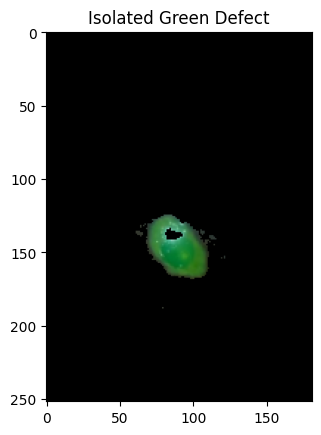

In [7]:
isolated_defect = cv2.bitwise_and(image, image, mask=mask)

plt.imshow(cv2.cvtColor(isolated_defect, cv2.COLOR_BGR2RGB))
plt.title('Isolated Green Defect')
plt.show()

In [ ]:
gray_defect = cv2.cvtColor(isolated_defect, cv2.COLOR_BGR2GRAY)
#converting to greyscale

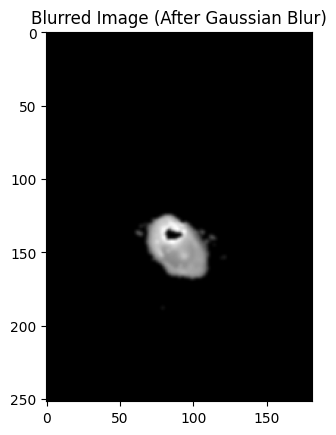

In [ ]:
# to reduce noise and small artifacts in the image
blurred_image = cv2.GaussianBlur(gray_defect, (5, 5), 0)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (After Gaussian Blur)')
plt.show()

In [ ]:
#Otsu's Binarization to convert the grayscale image to a binary image.
_, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

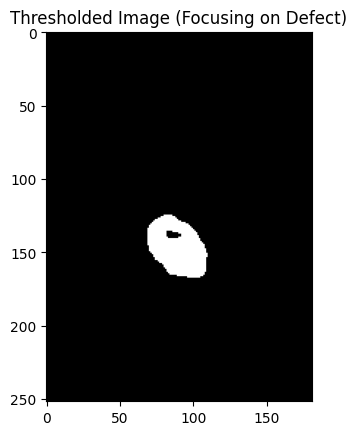

In [ ]:
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image (Focusing on Defect)')
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=2)

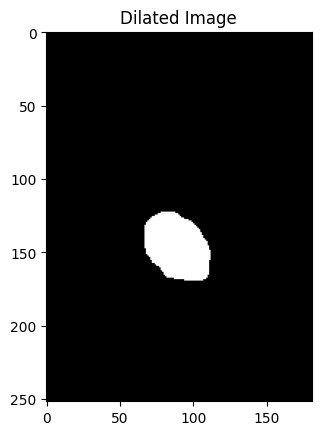

In [ ]:
# Dilation: Expands the white regions in the binary image to close gaps in the detected green regions
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.show()

In [ ]:
# Finding contours of the defect region
contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

# Iterate through each contour and print its area
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    print(f"Contour {i+1} area: {area:.2f} pixels")


Number of contours found: 1
Contour 1 area: 1559.00 pixels


Area of the epithelial defect: 6.29 sq.mm


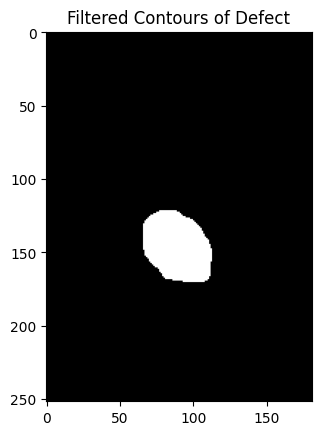

In [ ]:
contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours) > 0:
    #finding area
    contour_area = cv2.contourArea(contours[0])
    #considered average human eye size for scaling between mm and pixels

    # Scaling factor: 1 mm =  15.74 pixels
    scale =  15.74  # pixels per mm
    area_sq_mm = contour_area / (scale * scale)

    print(f"Area of the epithelial defect: {area_sq_mm:.2f} sq.mm")


    contour_image = cv2.drawContours(dilated_image.copy(), contours, -1, (255, 255, 255), 2)
    plt.imshow(contour_image, cmap='gray')
    plt.title('Filtered Contours of Defect')
    plt.show()

else:
    print("No contours found.")
